## Import

In [32]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")

path2folder = "Alfa Campus Junior ML_ Материалы"
data = pd.read_csv(f"{path2folder}/dataset.csv")
sub_example = pd.read_csv(f"{path2folder}/submission_example.csv")

In [33]:
data["client_start_date"] = pd.to_datetime(data["client_start_date"])
data["partnerrolestart_date"] = pd.to_datetime(data["partnerrolestart_date"])

## EDA

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130818 entries, 0 to 130817
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   clientbankpartner_pin   130818 non-null  int64         
 1   client_pin              130818 non-null  int64         
 2   partner_src_type_ccode  130818 non-null  int64         
 3   client_start_date       130818 non-null  datetime64[ns]
 4   partnerrolestart_date   130818 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 5.0 MB


In [35]:
data["clientbankpartner_pin"].unique().shape

(9471,)

In [36]:
data.isna().any()

clientbankpartner_pin     False
client_pin                False
partner_src_type_ccode    False
client_start_date         False
partnerrolestart_date     False
dtype: bool

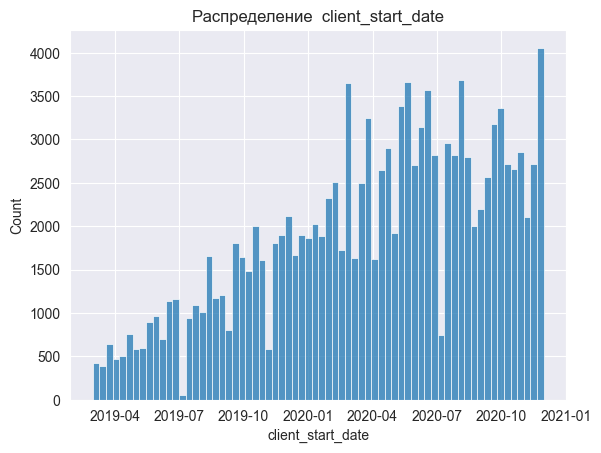

In [61]:
sns.histplot(data["client_start_date"])
plt.title(f'Распределение  client_start_date')
plt.show()

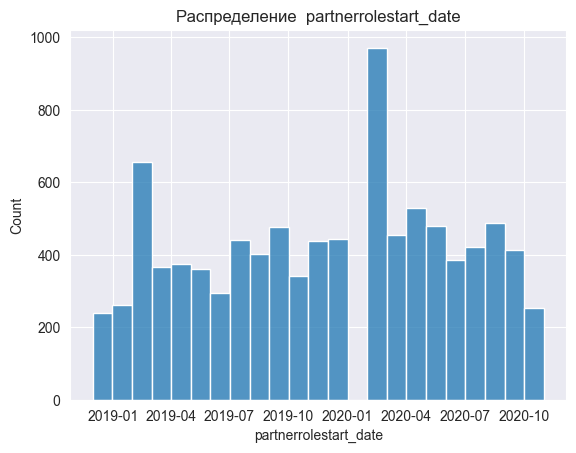

In [65]:
sns.histplot(data.groupby("clientbankpartner_pin")["partnerrolestart_date"].apply(lambda x: list(x)[0]))
plt.title(f'Распределение  partnerrolestart_date')
plt.show()

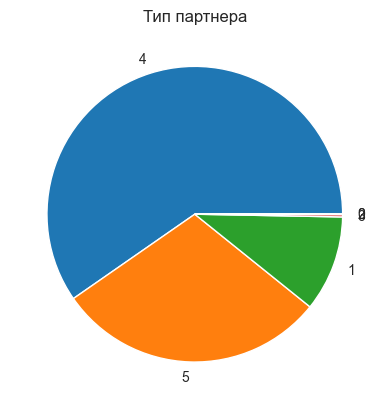

In [60]:
dat = data.groupby("clientbankpartner_pin")["partner_src_type_ccode"].apply(lambda x: list(x)[0]).value_counts().reset_index()
x = dat["partner_src_type_ccode"]
y = dat["count"]
plt.title(f'Тип партнера')
plt.pie(y, labels=x)
plt.show()

In [80]:
count_data = data.groupby("clientbankpartner_pin").size().reset_index()
count_data.columns = ["clientbankpartner_pin", "count"]


def get_count(x):
    return count_data[count_data["clientbankpartner_pin"] == x]["count"].values[0]


new_data = data.drop(columns=["client_pin", "client_start_date"])
new_data = new_data.drop_duplicates()
new_data["count"] = new_data["clientbankpartner_pin"].apply(lambda x: get_count(x))

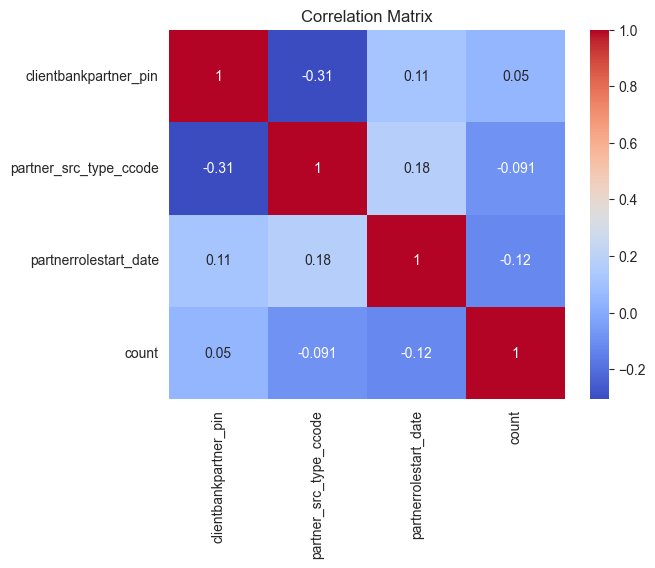

In [82]:
correlation_matrix = new_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [89]:
new_data["count"].describe()

count    9479.000000
mean       13.831628
std        46.096673
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max      1790.000000
Name: count, dtype: float64